### Importance of Python, Machine Learning, and AI

Python has emerged as the dominant language in Machine Learning and AI development due to its readability, community support, and powerful libraries. By integrating these libraries seamlessly, Python allows data scientists and ML engineers to prototype, test, and deploy models efficiently.


#### NumPy – The Foundation of ML Frameworks

NumPy provides the fundamental data structures (n-dimensional arrays) and numerical computation routines that power most ML workflows. It serves as the low-level engine behind higher-level frameworks:

**TensorFlow** and **PyTorch** use NumPy-like data structures to handle tensor operations efficiently.
Scikit-learn provides classical machine learning algorithms (like regression, classification, clustering) and easy-to-use APIs for model training, evaluation, and hyperparameter tuning. It remains a core library for smaller or more traditional ML tasks.

#### Pandas – Data Handling and Manipulation

**Pandas** excels at tabular data manipulation. Whether it’s merging datasets, handling missing values, or performing quick statistical summaries, Pandas is indispensable for data preparation stages before feeding it into ML models.

#### Matplotlib & Seaborn – Data Visualization

**Matplotlib** is the original plotting library that allows the customisation of plots for thorough data exploration.
Seaborn builds on Matplotlib by offering more advanced statistical plots and streamlined code syntax, making visualising the distribution and relationship of data points easier.

### TensorFlow

While multiple deep learning frameworks are available, we will use TensorFlow throughout this module. TensorFlow offers:

- **Automatic Differentiation:** Streamlines gradient-based optimisation using computational graphs and tf.GradientTape().
- **Wide Ecosystem:** Includes Keras (a high-level API), TensorBoard for visualisation, and deployment options across different platforms.

#### Computing a Gradient of a Linear Equation with Sigmoidal Activation in TensorFlow

A typical operation in deep learning is computing gradients of a loss function concerning parameters (weights and biases).

- Implement a TensorFlow-based computation of the gradient of a given vector function.
- Generate a graphical visualisation to demonstrate the correctness of the computed gradient.
- Analyse and explain the relationship between the function and its gradient using the visualisation.
- Share the code, results, and interpretation on the designated discussion forum.

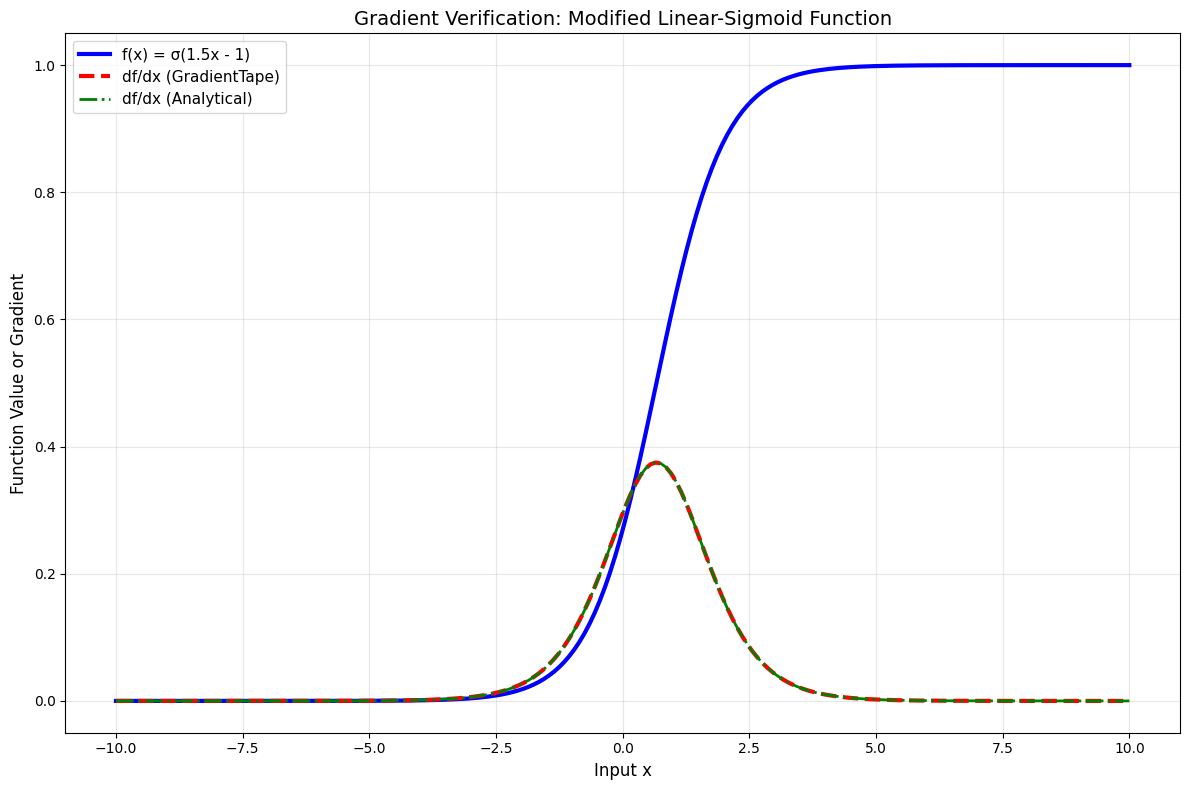

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define parameters as trainable variables
w = tf.Variable(1.5, dtype=tf.float32, name="weight")
b = tf.Variable(-1.0, dtype=tf.float32, name="bias")

# Define the linear-sigmoid function
def linear_sigmoid(x):
    z = w * x + b  # Linear transformation
    return tf.sigmoid(z)  # Sigmoid activation

# Generate input domain
x_domain = tf.linspace(-10.0, 10.0, 200)

# Compute function values and gradients using GradientTape
with tf.GradientTape() as tape:
    tape.watch(x_domain)  # Watch the input tensor
    f_values = linear_sigmoid(x_domain)

gradients = tape.gradient(f_values, x_domain)  # Computed df/dx

# Analytical gradient for verification: df/dx = w * sigmoid(z) * (1 - sigmoid(z))
analytical_grad = w * f_values * (1 - f_values)

# Plot for visual verification
plt.figure(figsize=(12, 8))
plt.plot(x_domain, f_values, 'b-', linewidth=3, label='f(x) = σ(1.5x - 1)')
plt.plot(x_domain, gradients, 'r--', linewidth=3, label='df/dx (GradientTape)')
plt.plot(x_domain, analytical_grad, 'g-.', linewidth=2, label='df/dx (Analytical)')
plt.xlabel('Input x', fontsize=12)
plt.ylabel('Function Value or Gradient', fontsize=12)
plt.title('Gradient Verification: Modified Linear-Sigmoid Function', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('gradient_verification_graph.png', dpi=300)
plt.show()

Analytic loss L: 0.028399644
Analytic dL/dW: [[-0.02933749]]
Analytic dL/db: [-0.05867499]
Numerical dL/dW:
 [[-0.0298312]]
Numerical dL/db:
 [-0.05895214]
Relative error for dW: [[0.01655002]]
Relative error for dB: [0.00470134]


/tmp/ipykernel_19276/1156428210.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_plus = 0.5 * ((float(fx_plus) - float(y)) ** 2)
/tmp/ipykernel_19276/1156428210.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_minus = 0.5 * ((float(fx_minus) - float(y)) ** 2)
/tmp/ipykernel_19276/1156428210.py:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  L_plus = 0.5 * ((float(fx_plus) - float(y)) ** 2)
/tmp/ipykernel_19276/1156428210.py:96: DeprecationWarning: Con

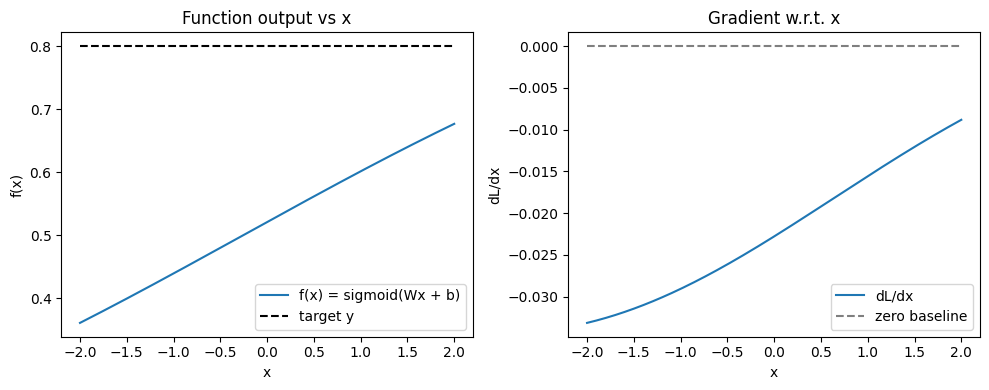

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ----------------------------
# 1) Define the modified linear-sigmoid function
#    f(x) = sigmoid(W @ x + b)
#    We consider x as a column vector in R^n
# ----------------------------
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# We’ll implement in TensorFlow to leverage autodiff
def build_model(W_shape, b_shape):
    W = tf.Variable(tf.random.normal(W_shape, mean=0.0, stddev=1.0, dtype=tf.float32), name="W")
    b = tf.Variable(tf.random.normal(b_shape, mean=0.0, stddev=1.0, dtype=tf.float32), name="b")
    return W, b

# Forward function: applies linear transform then sigmoid
@tf.function
def forward(W, b, x):
    """
    x: shape (n, ) or (n, 1)
    Returns: f(x) = sigmoid(Wx + b)
    """
    z = tf.linalg.matvec(W, x) + b  # W @ x + b; handles x as vector
    f = tf.sigmoid(z)
    return f

# ----------------------------
# 2) Gradient computation (analytic via autodiff)
#    We define a scalar loss L for which we take gradients
#    Example: L = 0.5 * ||f(x) - y||^2, where y is target
# ----------------------------
def analytic_gradients(W, b, x, y):
    """
    Compute gradients of L with respect to W and b using TF autodiff
    L = 0.5 * ||f(x) - y||^2
    """
    with tf.GradientTape() as tape:
        # Ensure variables are tracked
        tape.watch([W, b])
        fx = forward(W, b, x)  # shape (1,)
        L = 0.5 * tf.reduce_sum((fx - y) ** 2)
    dL_dW, dL_db = tape.gradient(L, [W, b])
    return L, dL_dW, dL_db

# ----------------------------
# 3) Gradient checking (numerical)
#    Compare analytic gradients to finite-difference estimates
# ----------------------------
def numerical_gradients(W, b, x, y, eps=1e-5):
    """
    Compute numerical gradients of L with respect to W and b by finite differences
    """
    W_np = W.numpy()
    b_np = b.numpy()

    # Gradient w.r.t. W
    num_dW = np.zeros_like(W_np)
    it = np.nditer(W_np, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        orig = W_np[idx]
        # fwd
        W_np[idx] = orig + eps
        fx_plus = forward(tf.constant(W_np), tf.constant(b_np), x).numpy()
        L_plus = 0.5 * ((float(fx_plus) - float(y)) ** 2)
        # bwd
        W_np[idx] = orig - eps
        fx_minus = forward(tf.constant(W_np), tf.constant(b_np), x).numpy()
        L_minus = 0.5 * ((float(fx_minus) - float(y)) ** 2)
        # restore
        W_np[idx] = orig

        num_dW[idx] = (L_plus - L_minus) / (2 * eps)
        it.iternext()

    # Gradient w.r.t. b
    num_dB = np.zeros_like(b_np)
    it = np.nditer(b_np, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        orig = b_np[idx]
        # fwd
        b_np[idx] = orig + eps
        fx_plus = forward(tf.constant(W_np), tf.constant(b_np), x).numpy()
        L_plus = 0.5 * ((float(fx_plus) - float(y)) ** 2)
        # bwd
        b_np[idx] = orig - eps
        fx_minus = forward(tf.constant(W_np), tf.constant(b_np), x).numpy()
        L_minus = 0.5 * ((float(fx_minus) - float(y)) ** 2)
        # restore
        b_np[idx] = orig

        num_dB[idx] = (L_plus - L_minus) / (2 * eps)
        it.iternext()

    return num_dW, num_dB

# ----------------------------
# 4) Visualization
#    Plot x vs f(x) and gradient magnitude along a 1D sweep
# ----------------------------
def visualize(W, b, x_vals, y_target):
    """
    For a 1D sweep over x, plot:
      - f(x) = sigmoid(Wx + b)
      - gradient dL/dx via chain rule: dL/df * df/dx
        where L = 0.5*(f - y)^2, so dL/df = (f - y)
        df/dx = df/dz * dz/dx = f*(1-f) * W
        For vector x, we assume W is shape (1, n) and x is scalar sweep along a chosen dimension.
    """
    # This helper assumes a simple 1D scenario for visualization ease:
    # We'll fix all but one input dimension and sweep that input.
    W_val = W.numpy()
    b_val = b.numpy()
    # For visualization, pick a row/column direction
    # We assume W has shape (1, n), so we can sweep along n-dim input
    # Here, we’ll just implement a simple plot for the case n=1 for clarity
    if W_val.shape[1] != 1:
        print("Visualization is designed for n=1. For higher dimensions, reduce to a 1D slice.")
        return

    W0 = float(W_val[0, 0])
    b0 = float(b_val[0])
    f_vals = []
    L_vals = []
    dL_df_vals = []
    for xv in x_vals:
        z = W0 * xv + b0
        f = 1.0 / (1.0 + np.exp(-z))
        L = 0.5 * (f - y_target) ** 2
        df_dx = f * (1 - f) * W0
        dL_df = (f - y_target)
        dL_dx = dL_df * df_dx
        f_vals.append(f)
        L_vals.append(L)
        dL_df_vals.append(dL_dx)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(x_vals, f_vals, label='f(x) = sigmoid(Wx + b)')
    plt.plot(x_vals, [y_target]*len(x_vals), 'k--', label='target y')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function output vs x')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x_vals, dL_df_vals, label='dL/dx')
    plt.plot(x_vals, [0.0]*len(x_vals), 'k--', alpha=0.5, label='zero baseline')
    plt.xlabel('x')
    plt.ylabel('dL/dx')
    plt.title('Gradient w.r.t. x')
    plt.legend()

    plt.tight_layout()
    plt.show()

# ----------------------------
# 5) Example usage and interpretation
# ----------------------------
def main():
    # Dimensions
    n = 1  # for simple visualization, use n=1; for generality, set n>1
    m = 1  # number of outputs in this setup (scalar loss uses scalar f)

    # Build model parameters
    W_shape = (m, n)  # W has shape (output_dim, input_dim)
    b_shape = (m,)

    W, b = build_model(W_shape, b_shape)

    # Example input x (n,)
    x = tf.constant(np.array([0.5], dtype=np.float32))  # shape (1,)

    # Target output y for loss L = 0.5*(f - y)^2
    y = tf.constant(np.array([0.8], dtype=np.float32))

    # Analytic gradients
    L, dL_dW, dL_db = analytic_gradients(W, b, x, y)
    print("Analytic loss L:", L.numpy())
    print("Analytic dL/dW:", dL_dW.numpy())
    print("Analytic dL/db:", dL_db.numpy())

    # Numerical gradients (gradient checking)
    num_dW, num_dB = numerical_gradients(W, b, x, y)
    print("Numerical dL/dW:\n", num_dW)
    print("Numerical dL/db:\n", num_dB)

    # Compare (relative error)
    dW_err = np.abs(dL_dW.numpy() - num_dW) / (np.maximum(1e-8, np.abs(num_dW)))
    dB_err = np.abs(dL_db.numpy() - num_dB) / (np.maximum(1e-8, np.abs(num_dB)))
    print("Relative error for dW:", dW_err)
    print("Relative error for dB:", dB_err)

    # Visualization for the 1D case (n=1)
    # Sweep x from -2 to 2
    x_vals = np.linspace(-2.0, 2.0, 200)
    visualize(W, b, x_vals, y_target=float(y.numpy()))

if __name__ == "__main__":
    main()